<a href="https://colab.research.google.com/github/sergioarnold87/Practica_Sergio/blob/main/Construir_SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Montamos nuestro Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Importamos las librerias

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# El dataset que va a ser usado

In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Datasets/Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Debo hacer el escalado de caracteristicas

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Entrenar SOM

In [8]:
import sys
sys.path.append('/content/drive/MyDrive/Datasets')
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len= 15, sigma = 1.0, learning_rate= 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

# Visualziar los resultados 

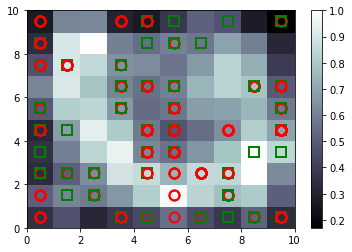

In [16]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors =  ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5, w[1]+0.5,
         markers[y[i]], markeredgecolor = colors[y[i]], markerfacecolor = 'None',
         markersize = 10, markeredgewidth = 2)
show()

# Encontrar los fraudes

In [ ]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(6,1)], mappings[(7,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)  